**Time Series Forecasting and Portfolio Optimization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

**Fetching Data**

In [2]:
# Time period
start_date="2015-07-01"
end_date="2025-07-31"
# asset
assets=['TSLA','BND','SPY']

# Extracting Data
data=yf.download(assets,start=start_date,end=end_date)

# Generic Statistical Description

print("data.shape:", data.shape)
print("\nData Columns:")
print(data.columns.levels[0].tolist())

# Highight of the dataset
print("\n First 5 rows of the dataset")
print(data.head())

# Extractiong of Adjusted Close prices
price=data['Close'].copy()

# Searching for missing values
print("\n Missing Values:")
print(price.isna().sum())

# Replacing Missing values with forwardfill
if price.isna().sum().any():
    price=price.fillna(method='ffill')
    print("Missing values filled using forward fill")

C:\Users\hp\AppData\Local\Temp\ipykernel_11260\3660332908.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(assets,start=start_date,end=end_date)
[*********************100%***********************]  3 of 3 completed


data.shape: (2535, 15)

Data Columns:
['Close', 'High', 'Low', 'Open', 'Volume']

 First 5 rows of the dataset
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816689  174.917114  17.943333  60.914414  175.363889   
2015-07-02  60.967083  174.756927  18.667999  61.027225  175.566188   
2015-07-06  61.177589  174.259644  18.648001  61.222698  175.043603   
2015-07-07  61.237747  175.355469  17.858667  61.470789  175.481910   
2015-07-08  61.410625  172.413422  16.997334  61.463248  174.293250   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764066  174.124717  17.856667  60.794137   
2015-07-02  18.830000  60.937012  174.33


Seasonality and Trends:
        annualized return  annualized volatility  sharpe ratio
Ticker                                                        
BND              0.019599               0.054919      0.356880
SPY              0.144844               0.182407      0.794072
TSLA             0.460690               0.591887      0.778340


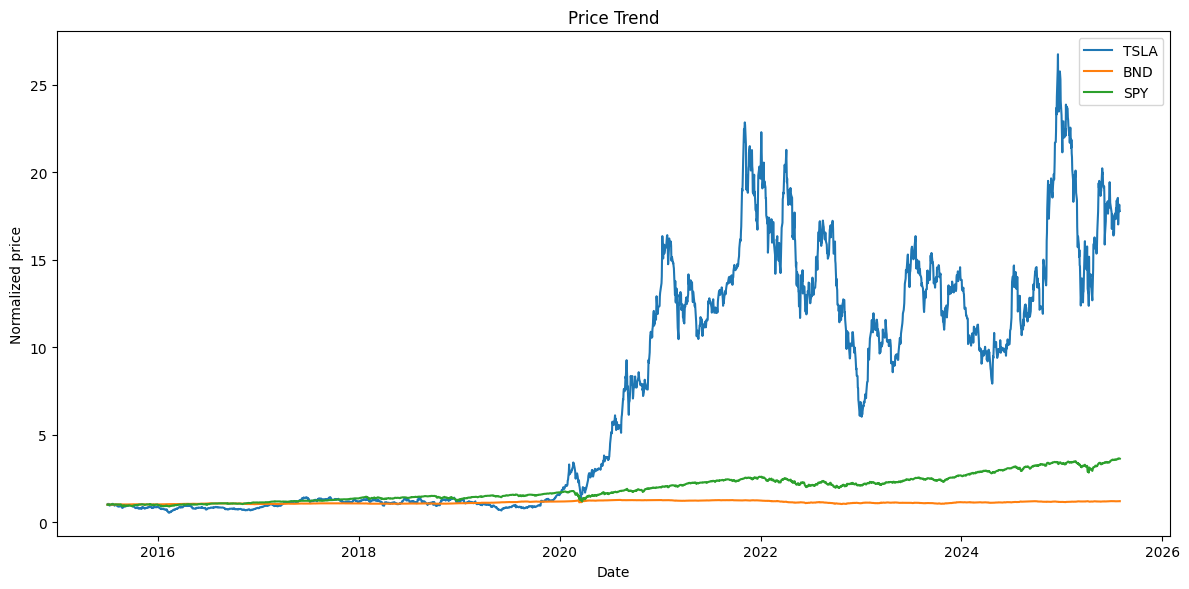

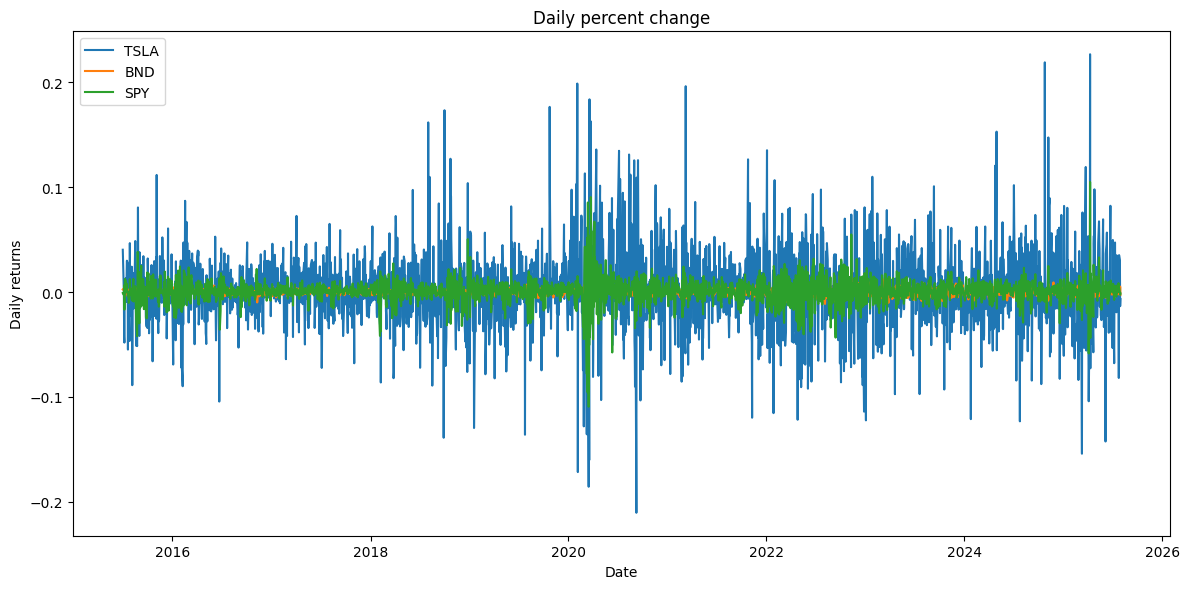

In [3]:
# Exploratory Data Analysis
# Daily resturns
returns=price.pct_change().dropna()

#ploting price trend 

plt.figure(figsize=(12,6))
for asset in assets:
    plt.plot(price.index,price[asset]/price[asset].iloc[0],label=asset)
    plt.title('Price Trend')
    plt.ylabel('Normalized price')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# plot of teh change percentage
plt.figure(figsize=(12,6))
for ticker in assets:
    plt.plot(returns.index,returns[ticker],label=ticker)
    plt.title('Daily percent change')
    plt.ylabel('Daily returns')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()



# Key statistics
print("\nSeasonality and Trends:")
summary_stats=pd.DataFrame(index=returns.columns)
summary_stats['annualized return']=returns.mean() *252 # number of trading days in a year
summary_stats['annualized volatility']=returns.std() * np.sqrt(252)
summary_stats['sharpe ratio']= summary_stats['annualized return']/summary_stats['annualized volatility']
print(summary_stats[['annualized return','annualized volatility','sharpe ratio']])